In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Market Share Distribution by brand - groups up all brands with lower than 1% market share

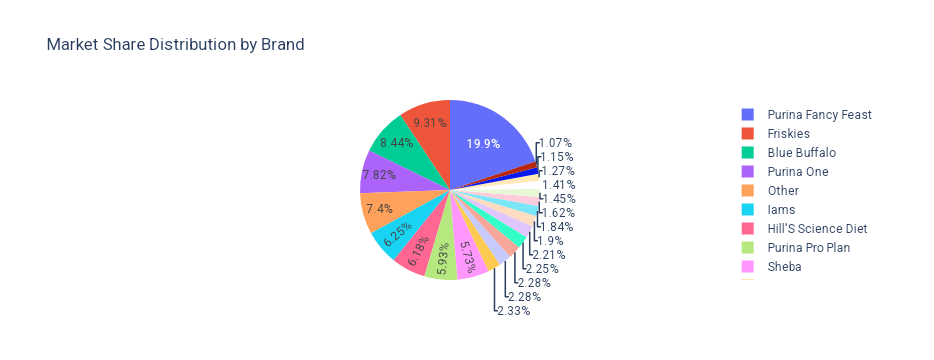

In [194]:
# Load brand data
brand_data = pd.read_excel('Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Segment Brands', header=1)

# Summarize total revenue by brand
brand_revenue = brand_data.groupby('Brand')['Revenue'].sum().reset_index()

# Calculate market share
brand_revenue['Market Share'] = (brand_revenue['Revenue'] / brand_revenue['Revenue'].sum()) * 100

# Define a threshold for minimum market share to be shown individually
threshold = 1  # for example, 1%

# Create a new row for 'Other' by summing up brands below the threshold
other_revenue = brand_revenue[brand_revenue['Market Share'] < threshold]['Revenue'].sum()
other_market_share = brand_revenue[brand_revenue['Market Share'] < threshold]['Market Share'].sum()

# Remove brands below the threshold
brand_revenue = brand_revenue[brand_revenue['Market Share'] >= threshold]

# Append the 'Other' category to the DataFrame
other_row = pd.DataFrame(data={'Brand': ['Other'], 'Revenue': [other_revenue], 'Market Share': [other_market_share]})
brand_revenue = pd.concat([brand_revenue, other_row], ignore_index=True)

# Sort by market share to ensure 'Other' is not dominating the chart if it's a large share
brand_revenue.sort_values('Market Share', inplace=True)

# Create a pie chart
fig = px.pie(brand_revenue, values='Market Share', names='Brand', title='Market Share Distribution by Brand')

# Show the pie chart
fig.show()

Brand Performance Comparison

Grouping the data by 'Brand' to calculate the sum of revenues for each.
Sorting the results to ensure that the bar chart shows brands in order of their revenue performance.
Plotting the data using Plotly's bar chart function.

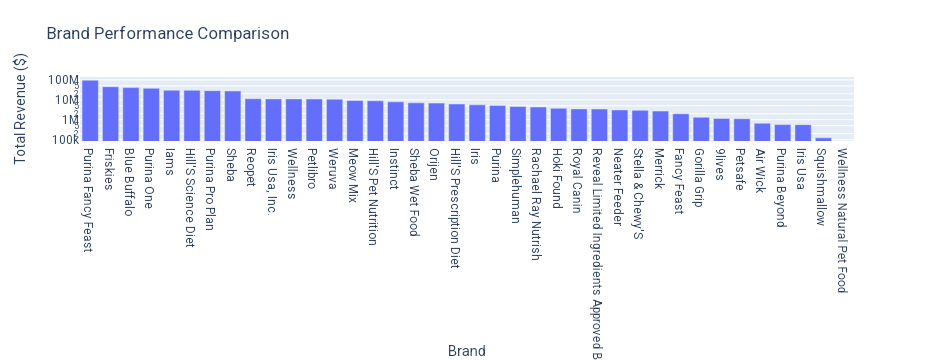

In [195]:
# Load brand data from the Excel sheet
brand_data = pd.read_excel('Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Segment Brands', header=1)

# Summarize total revenue by brand (assuming 'Brand' is the correct column name)
brand_performance = brand_data.groupby('Brand')['Revenue'].sum().reset_index()

# Sort the DataFrame based on revenue in descending order for better visualization
brand_performance = brand_performance.sort_values('Revenue', ascending=False)

# Create the bar chart
fig = px.bar(brand_performance, x='Brand', y='Revenue', title='Brand Performance Comparison')

# Improve the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Total Revenue ($)',
    xaxis={'categoryorder':'total descending'},  # This ensures the bars are sorted by revenue
    yaxis=dict(type='log')  # Using a log scale for the y-axis can be helpful if there are large differences in revenue
)

# Show the figure
fig.show()

Unit Sales Over Time for Top Brands

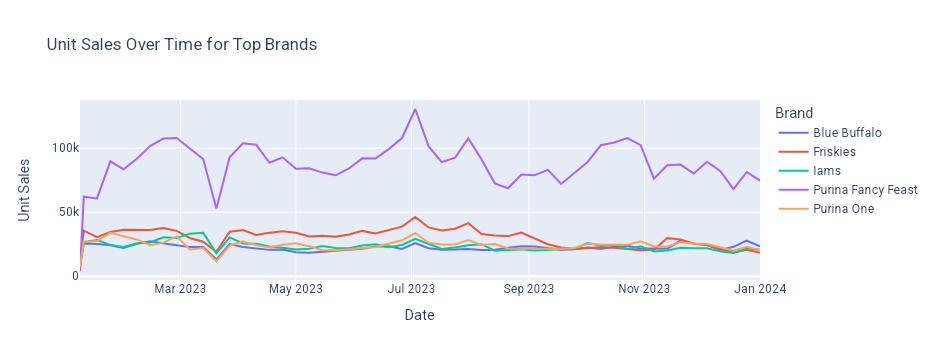

In [196]:
# Load the 'Weekly' data, assuming 'Weekly' data has the unit sales and 'Brand' information
sales_data = pd.read_excel('Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Weekly', header=1)

# Convert 'Week' to datetime (the following is a basic method; you may need to adjust it based on your actual data format)
sales_data['Week'] = pd.to_datetime(sales_data['Week'].str.split(' - ').str[0])

# Identify the top brands by total unit sales
top_brands = sales_data.groupby('Brand')['Units'].sum().nlargest(5).index

# Filter the data to include only the top brands
top_brands_data = sales_data[sales_data['Brand'].isin(top_brands)]

# Group by 'Week' and 'Brand' and sum up unit sales
unit_sales_over_time = top_brands_data.groupby(['Week', 'Brand'])['Units'].sum().reset_index()

# Pivot the data to have 'Week' as index and the unit sales of each top brand as a column
unit_sales_pivot = unit_sales_over_time.pivot(index='Week', columns='Brand', values='Units')

# Reset the index to turn 'Week' back into a column
unit_sales_pivot.reset_index(inplace=True)

# Melt the DataFrame to have a single 'Units' column with corresponding 'Brand' and 'Week'
unit_sales_melted = unit_sales_pivot.melt(id_vars='Week', var_name='Brand', value_name='Units')

# Plotting the multi-line chart
fig = px.line(unit_sales_melted, x='Week', y='Units', color='Brand', title='Unit Sales Over Time for Top Brands')

# Improve the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Unit Sales',
    legend_title='Brand'
)

# Show the figure
fig.show()

1P vs 3P Revenue over time. 3P beat 1P in march. 

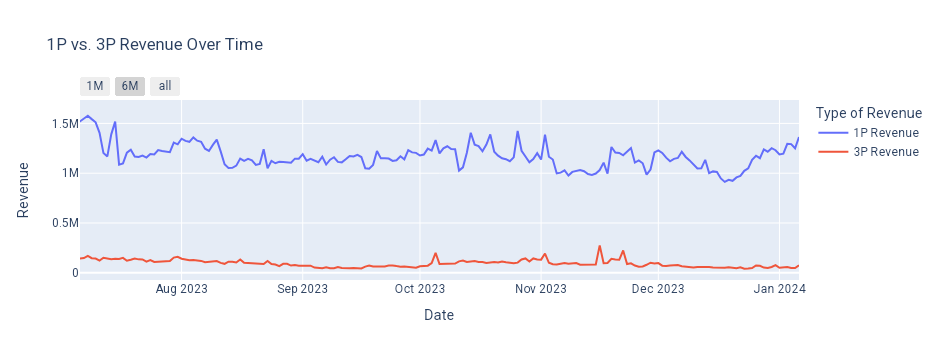

In [197]:
# Load data from the 'Segment Trends' sheet
trends_data = pd.read_excel('Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Segment Trends', header=1)

# Make sure the 'Date' column is in datetime format
trends_data['Date'] = pd.to_datetime(trends_data['Date'])

# Initialize a figure
fig = go.Figure()

# Add traces for 1P Revenue and 3P Revenue
fig.add_trace(go.Scatter(x=trends_data['Date'], y=trends_data['1P Revenue'], mode='lines', name='1P Revenue'))
fig.add_trace(go.Scatter(x=trends_data['Date'], y=trends_data['3P Revenue'], mode='lines', name='3P Revenue'))

# Customize the layout
fig.update_layout(
    title='1P vs. 3P Revenue Over Time',
    xaxis_title='Date',
    yaxis_title='Revenue',
    legend_title='Type of Revenue',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        type="date"
    )
)

# Show the plot
fig.show()


Unit Sales Growth Trend, Monthly

seems there was a recall in december 2023 which sharply affected brand sales. https://www.petful.com/brands/purina-recall/

It seems some of the same sources of ingredients may have been in multiple brands. These dropped down to 0 in December 2023. 

1. Hoki Found

2. Reopet

3. Wellness Natural Pet Food

4. Petlibro

5.Hill'S Science Diet

6.Hill'S Prescription Diet

7.Purina Pro Plan

8.Purina Pro Plan

9.Purina Fancy Feast


SQUISHMALLOW had massive growth; and interestingly they seem to be plushies for humans. Seems they have had big success in this segment as well. 


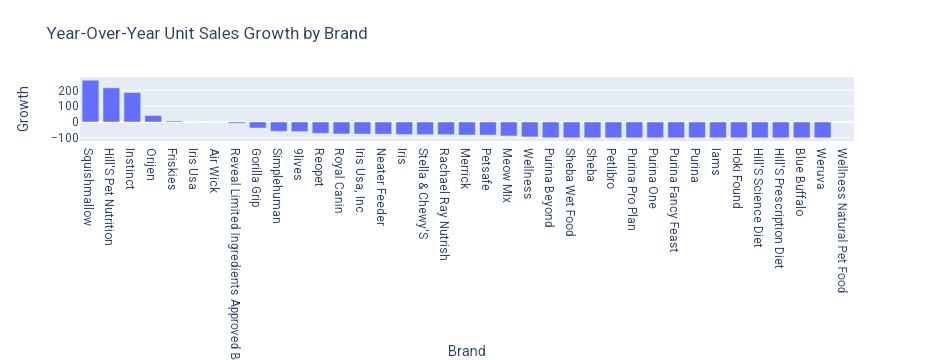

In [198]:
# Load the monthly data
monthly_data = pd.read_excel('Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Monthly', header=1)

# Convert the 'Month' column to datetime to ensure proper sorting
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'], format='%B')

# Sort the data
monthly_data.sort_values(by=['Brand', 'Year', 'Month'], inplace=True)

# Group by Brand and calculate the first and last entry for Units
# Assuming that the data is structured such that the first entry is from January and the last from December
brand_growth = monthly_data.groupby('Brand').agg(
    first_units=pd.NamedAgg(column='Units', aggfunc='first'),
    last_units=pd.NamedAgg(column='Units', aggfunc='last')
).reset_index()

def calculate_growth(row):
    if row['first_units'] == 0:
        return None if row['last_units'] == 0 else float('inf')
    return ((row['last_units'] - row['first_units']) / row['first_units']) * 100

brand_growth['Growth'] = brand_growth.apply(calculate_growth, axis=1)

# Calculate the growth percentage

# Sort by growth percentage
brand_growth = brand_growth.sort_values(by='Growth', ascending=False)

# Create a bar chart
fig = px.bar(brand_growth, x='Brand', y='Growth', title='Year-Over-Year Unit Sales Growth by Brand')

# Show the figure
fig.show()
